Optimized Dispatch of Hybrids
=============

Parameters for solar+storage chosen to match analysis in USS.  Storage can only charge from solar. 

In [1]:
from datetime import timedelta
#import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#set up locations
DIR = "G:\\Shared drives\\hybrid_projects\\raw_data\\proj_data\\analysis\\"

In [ ]:
##run optimization functions
import optimization_sensitivity_v2 as ho 
ho.main()

In [19]:
# Helper functions for plots
def plot(solar, schedule, storage, prices, schedule_label='gen+storage'):
    fig, ax = plt.subplots()
    ax = solar.plot(ax=ax, label='gen')
    ax = schedule.plot(ax=ax, label=schedule_label)
    ax = storage.plot(ax=ax, label="charging")
    ax2 = prices.plot(ax=ax, label='Prices', secondary_y=True)
    ax.set_ylim(0,220)
    ax2.set_ylim(0,220)
    ax.legend(loc='upper left')
    ax2.legend(loc=0)
    ax.set_xlabel('Local Time (Hour Beginning)')
    ax.set_ylabel('MW')
    ax2.set_ylabel('$/MWh')
    return ax, ax2, fig

def season_plots(solar, schedule, prices, schedule_name='solarplusstorage', schedule_label='gen+storage'):
    for seas in ['Winter', 'Spring', 'Summer', 'Autumn']:
        solar_seas = solar.groupby([season, solar.index.hour]).mean()[seas]
        schedule_seas = schedule[schedule_name].groupby([season, schedule.index.hour]).mean()[seas]
        storage_seas = schedule['storage_in'].groupby([season, schedule.index.hour]).mean()[seas]
        prices_seas = prices.groupby([season, prices.index.hour]).mean()[seas]
        ax, ax2, fig = plot(solar_seas, schedule_seas, storage_seas, prices_seas, schedule_label=schedule_label)
        ax.set_title(seas)
        

In [3]:
# Define the seasons

lookup = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
}

def season(x):
    return lookup[x.month]


In [8]:
#load in optimization data
results = pd.read_excel(DIR+"Results_1_base.xlsx", parse_dates=True)

#solar
prices = pd.read_csv(DIR+"\\all_ercot_profiles_hourly_2018.csv") ## OR ERCOT profiles
prices = prices.iloc[0:8762, :]
prices = prices.set_index('local_time_hb')
prices.index = pd.to_datetime(prices.index)

## Creating plotting variables
gen = pd.Series(results['solar_gen'].values,index=prices.index)
results = results.set_index(prices.index)
prices = pd.Series(results['energy_price'].values,index=prices.index)

C:\Users\wgorman\AppData\Roaming\Python\Python37\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


Diurnal Plots of Gen compared to Hybrid
---------------

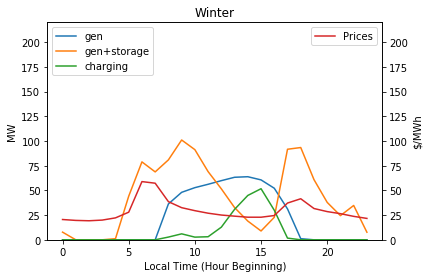

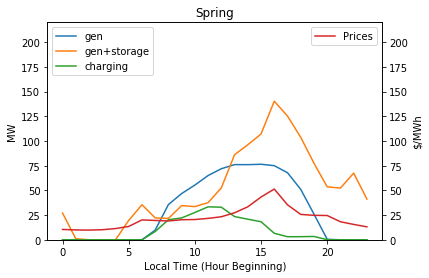

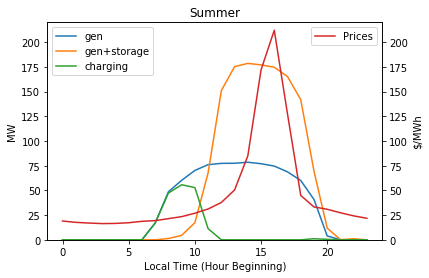

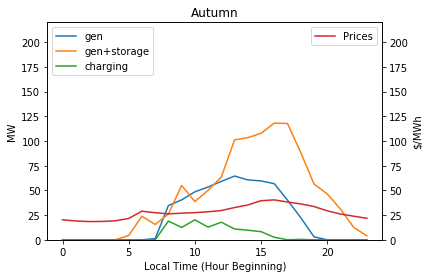

In [20]:
season_plots(gen, results, prices)

Diurnal Plots of Gen compared to  Storage
---------------

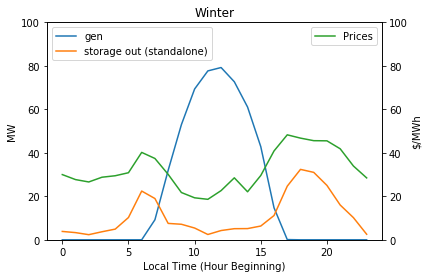

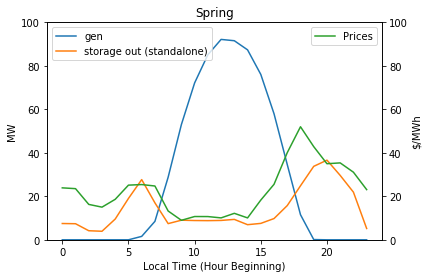

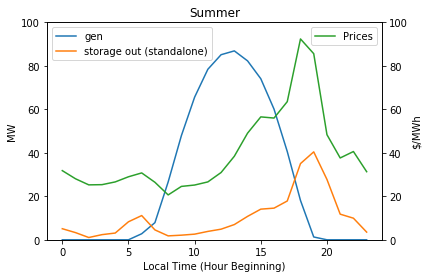

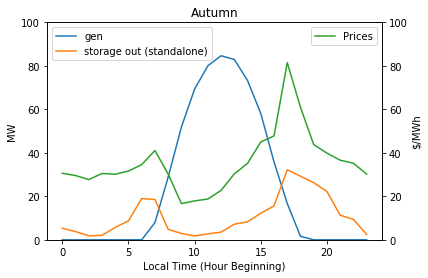

In [7]:
season_plots(gen, results, prices, schedule_name='power_out_s', schedule_label='storage out (standalone)')

Diurnal Plots of Solar compared to Input to Storage
---------------

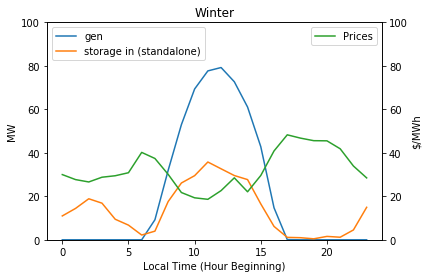

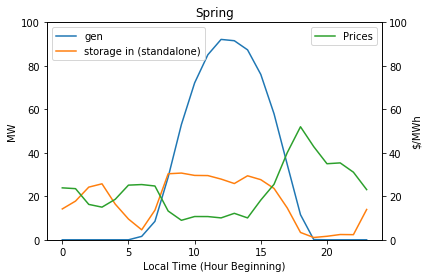

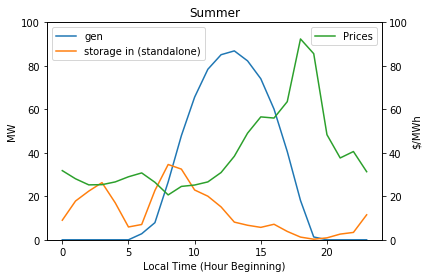

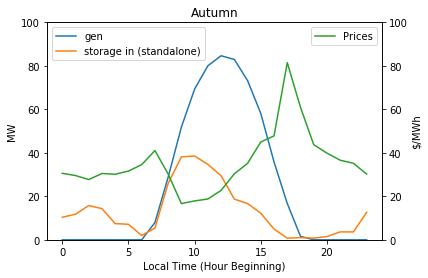

In [8]:
season_plots(gen, results, prices, schedule_name='power_in_s', schedule_label='storage in (standalone)')